#Imports and Load Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
import warnings
warnings.simplefilter(action='ignore')

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
churn_master_df = pd.read_csv('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/churn_data_st.csv')

In [0]:
churn_df = churn_master_df.copy()

In [4]:
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


# Exploring

In [5]:
churn_df.corr() # Does not calculate for string data / categorical data

,SeniorCitizen,tenure,ServiceCount,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,-0.090899,0.220173,0.102411
tenure,0.016567,1.000000,0.508526,0.247900,0.825880
ServiceCount,-0.090899,0.508526,1.000000,0.041463,0.443485
MonthlyCharges,0.220173,0.247900,0.041463,1.000000,0.651065
TotalCharges,0.102411,0.825880,0.443485,0.651065,1.000000


In [6]:
churn_df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

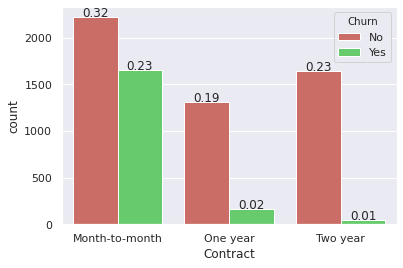

In [9]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots()

ax = sns.countplot(x="Contract", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

# Null Hypothesis: - 

- The two categorical Features have no correlation.

# Alternate Hypothesis: -

- The two features have strong correlation.

# Chi-Squared Statistic

- Proves that relationship is significant

$ \chi^2 = sum((observed - Expected) ^ 2 / Expected)$

# Cramer's V Test

$ V = sqrt(\chi ^ 2 / (n * min(C, R) - 1))$

- It is an extension of Chi-Squared Test.

- Used to perform analysis of categorical variables.

- Determines the strength of relation between the two categorical variables.

- It uses the input as Chi-Squared Test statistic.

- It will determine how strong is the relationship between variables.

In [10]:
pd.crosstab(index=churn_df['Contract'], columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1307,166,1473
Two year,1647,48,1695
All,5174,1869,7043


In [0]:
contract_churn_ct = pd.crosstab(index=churn_df['Contract'], columns=churn_df['Churn'])

In [14]:
contract_churn_ct

Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


In [16]:
print(contract_churn_ct.iloc[0].values)
print(contract_churn_ct.iloc[1].values)
print(contract_churn_ct.iloc[2].values)

[2220 1655]
[1307  166]
[1647   48]


In [0]:
from scipy import stats

In [0]:
(chi2, p, dof, _) = stats.chi2_contingency([contract_churn_ct.iloc[0].values, contract_churn_ct.iloc[1].values, contract_churn_ct.iloc[2].values])

In [22]:
print("chi2 = ", chi2)
print("p-value = ",p)
print("Degree of freedom = ",dof)

chi2 =  1184.5965720837926
p-value =  5.863038300673391e-258
Degree of freedom =  2


Degree of freedom = Total Categories - 1

p - value < 0.05.
Hence there is a significant relationship between these two variables

In [0]:
# There no builtin function sadly
# Here minimum of C, R column , row is column = 2 
# 2 - 1 = 1. 
import numpy as np

In [26]:
print(np.sqrt(chi2 / churn_df.shape[0]))

0.4101156965761409


In [0]:
# The value will always be between 0 to 1.
# Here it is 0.41  Strength of the relationship is pretty strong.
# Check real world application !!! Do not think only variable.

# Applying same to Paperless Billing

In [28]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

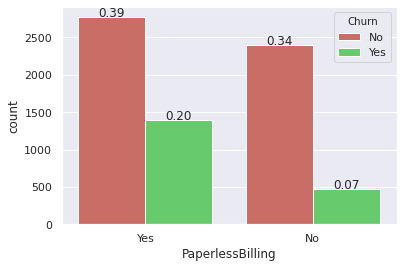

In [29]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots()

ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [0]:
pb_churn_ct = pd.crosstab(index=churn_df['PaperlessBilling'], columns=churn_df['Churn'])

In [39]:
pb_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [0]:
(chi2, p, dof, _) = stats.chi2_contingency([pb_churn_ct.iloc[0].values, pb_churn_ct.iloc[1].values])

In [42]:
print("Chi 2: ",chi2)
print("P-value: ",p)
print("Degree of freedom ",dof)

Chi 2:  258.27764906707307
P-value:  4.073354668665985e-58
Degree of freedom  1


In [43]:
# Running Cramer's V formula again
# Again Min of row, columns = columns = 2.
# 2 - 1 = 1
# Hence it reduces to 
print(np.sqrt(chi2/churn_df.shape[0]))

0.19149814355338285


# Repeating this for gender

In [44]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

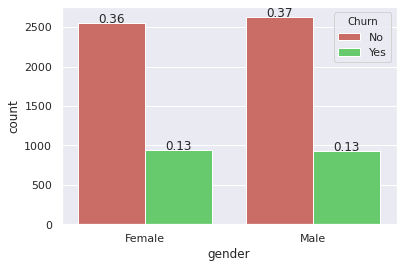

In [45]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots()

ax = sns.countplot(x="gender", hue="Churn", data=churn_df)

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [0]:
gn_churn_ct = pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'])

In [49]:
gn_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [0]:
(chi2, p, dof, _) = stats.chi2_contingency([gn_churn_ct.iloc[0].values, gn_churn_ct.iloc[1].values])

In [51]:
print("Chi 2: ",chi2)
print("P-value: ",p)
print("Degree of freedom ",dof)

Chi 2:  0.4840828822091383
P-value:  0.48657873605618596
Degree of freedom  1


- Wait. Here p-value > 0.05
- So this feature shouldn't be selected by $ \chi ^ 2 $ squared test itself

- We reject the alternate hypothesis. Null hypothesis is valid.

In [52]:
# Running Cramer's V formula again
# Again Min of row, columns = columns = 2.
# 2 - 1 = 1
# Hence it reduces to 
print(np.sqrt(chi2/churn_df.shape[0]))

0.008290505631771371


- Anyways Cramer is dependent on $\chi^2 $ test so it too will not give any significance